In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.environ.get('PATH'))

from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree


d:\liya\kecerdasan buatan\jurnal\program yang btul\venv\Scripts;D:\liya\kecerdasan buatan\jurnal\program yang btul\venv\Scripts;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Program Files (x86)\Common Files\Oracle\Java\java8path;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Python312\Scripts\;C:\Python312\;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\nodejs\;C:\ProgramData\chocolatey\bin;C:\Program Files\Git\cmd;C:\Program Files\MariaDB 11.6\bin;C:\Program Files\MySQL\MySQL Shell 8.0\bin\;C:\Users\LOQ\AppData\Local\Programs\Python\Python310\Scripts\;C:\Users\LOQ\AppData\Local\Programs\Python\Python310\;C:\Users\LOQ\AppData\Local\Microsoft\WindowsApps;C:\Users\LOQ\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\LOQ\Downloads\MinGW\bin;C:\Users\LOQ\AppData\

Preprocessing Data

In [ ]:
# 1. Membaca Data

data = pd.read_csv('diabetes.csv')  # Pastikan path file benar
print("Data Masukan:\n", data.head())
print(len(data))

Data Masukan:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
768


A. Headling Missing Value


Setelah Handling Missing Value (Imputasi Mean):
    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


C:\Users\LOQ\AppData\Local\Temp\ipykernel_20712\3291806683.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_after.index, y=missing_values_after.values, palette="viridis")


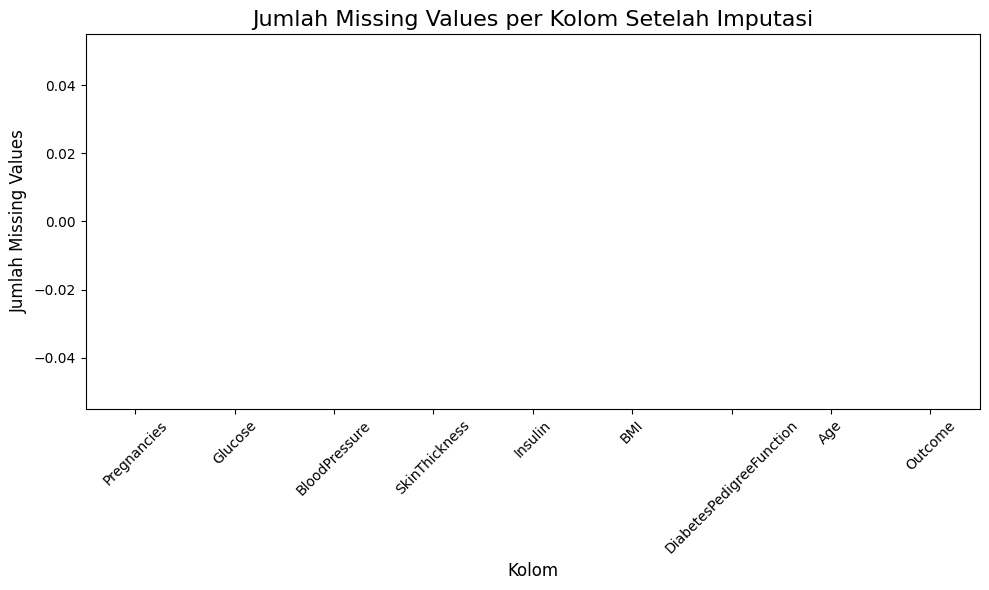

Jumlah data setelah headling missing :  768


In [4]:
# 2. Handling Missing Value dengan Imputasi Mean
# Mengganti nilai yang hilang dengan nilai rata-rata pada kolom tertentu
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in columns_with_missing_values:
    data[column] = data[column].replace(0, np.nan)  # Mengganti nilai nol menjadi NaN jika nol dianggap missing
    data[column] = data[column].fillna(data[column].mean())  # Mengganti NaN dengan rata-rata kolom

print("\nSetelah Handling Missing Value (Imputasi Mean):\n", data.head())

# Menampilkan jumlah nilai yang hilang setelah imputasi
missing_values_after = data.isnull().sum()

# Membuat grafik jumlah nilai hilang setelah imputasi
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_after.index, y=missing_values_after.values, palette="viridis")
plt.title("Jumlah Missing Values per Kolom Setelah Imputasi", fontsize=16)
plt.xlabel("Kolom", fontsize=12)
plt.ylabel("Jumlah Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

jumlah_setelah_hedling_missing = len(data)

print("Jumlah data setelah headling missing : ", jumlah_setelah_hedling_missing)

B. Headling Outlier


Setelah Handling Outlier (Z-Score < -3 atau > 3 dihapus):
    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
5            5    116.0           74.0       29.15342  155.548223  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  
Jumlah data setelah proses headling outlier :  719


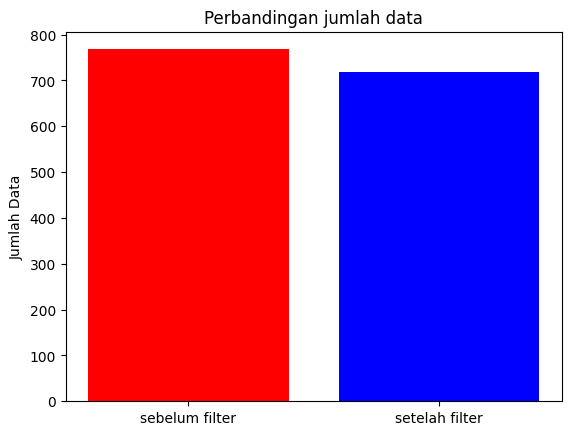

Jumlah data sebelum filter: 768
Jumlah data setelah filter: 719


In [5]:
# 3. Handling Outlier menggunakan Z-Score
# Menghitung Z-Score untuk setiap kolom fitur numerik
z_scores = np.abs(zscore(data.drop(columns=['Outcome'])))  # Mengabaikan kolom 'Outcome' saat menghitung z-score

# Menyaring data dengan Z-Score di luar rentang -3 dan 3
data_no_outliers = data[(z_scores < 3).all(axis=1)]  # Menyaring data yang memiliki Z-Score < 3 dan > -3
print("\nSetelah Handling Outlier (Z-Score < -3 atau > 3 dihapus):\n", data_no_outliers.head())

jumlah_data_setelah_headling_outlier = len(data_no_outliers)

print("Jumlah data setelah proses headling outlier : ", jumlah_data_setelah_headling_outlier)

# Visualisasi jumlah data sebelum dan sesudah filter
plt.bar(['sebelum filter', 'setelah filter'], [jumlah_setelah_hedling_missing, jumlah_data_setelah_headling_outlier], color=['red', 'blue'])
plt.title('Perbandingan jumlah data')
plt.ylabel('Jumlah Data')
plt.show()

print(f"Jumlah data sebelum filter: {jumlah_setelah_hedling_missing}")
print(f"Jumlah data setelah filter: {jumlah_data_setelah_headling_outlier}")


C. Normalisasi

In [12]:
# 4. Normalisasi Data (Min-Max Scaler)
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_no_outliers.drop(columns=['Outcome'])),
                               columns=data_no_outliers.columns[:-1])  # Normalisasi fitur, kecuali kolom 'Outcome'
data_normalized['Outcome'] = data_no_outliers['Outcome'].values  # Menambahkan kembali kolom 'Outcome' yang tidak dinormalisasi

print("\nData sebelum normalisasi:\n", data_no_outliers)
print("\nData setelah normalisasi:\n", data_normalized)


Data sebelum normalisasi:
      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
5              5    116.0           74.0       29.15342  155.548223  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0

D. Menyimpan Data

In [7]:
# 5. Menyimpan Data Hasil Preprocessing ke CSV
data_normalized.to_csv('preprocessed_diabetes.csv', index=False)  # Menyimpan hasil preprocessing ke file CSV

print("Data Setelah Hasil Preprocessing Telah di simpan")

Data Setelah Hasil Preprocessing Telah di simpan


Processing

    A. Bagi Data

In [8]:
# Memuat dataset
data = pd.read_csv('preprocessed_diabetes.csv')  # Gantilah dengan path yang sesuai

# Pisahkan fitur (X) dan label (y)
X = data.drop(columns=['Outcome'])  # Kolom fitur, tanpa 'Outcome'
y = data['Outcome']                # Kolom target 'Outcome'

# Bagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data hasil pembagian
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran label latih (y_train):", y_train.shape)
print("Ukuran label uji (y_test):", y_test.shape)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("File berhasil disimpan dan siap diunduh.")

Ukuran data latih (X_train): (575, 8)
Ukuran data uji (X_test): (144, 8)
Ukuran label latih (y_train): (575,)
Ukuran label uji (y_test): (144,)
File berhasil disimpan dan siap diunduh.


    B. Load Data Training dan Testing

In [9]:
# 1. Membaca kembali data latih dan data uji
X_train = pd.read_csv('X_train.csv')  # File hasil pembagian data latih
X_test = pd.read_csv('X_test.csv')    # File hasil pembagian data uji
y_train = pd.read_csv('y_train.csv')  # Label latih
y_test = pd.read_csv('y_test.csv')    # Label uji

# Pastikan y_train dan y_test menjadi array 1 dimensi
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

    C. Training and Testing Data

        C.1. Menggunakan Decision Tree

In [ ]:
# 2. Inisialisasi model Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# 3. Melatih model pada data latih
clf.fit(X_train, y_train)

# Menampilkan parameter model yang sudah dilatih
print("\nParameter Model yang Telah Dilatih:")
print(clf.get_params())

# Menampilkan pentingnya fitur
print("\nPentingnya Fitur (Feature Importance):")
feature_importance = clf.feature_importances_
for name, importance in zip(X_train.columns, feature_importance):
    print(f"{name}: {importance}")

# Akurasi pada data latih
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f"\nAkurasi pada data latih (Decision Tree): {train_accuracy}")

# 4. Menguji model pada data uji
y_pred = clf.predict(X_test)

# 5. Evaluasi Model
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data uji (Decision Tree): {accuracy}")


Parameter Model yang Telah Dilatih:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Pentingnya Fitur (Feature Importance):
Pregnancies: 0.00802070509814686
Glucose: 0.4774801564032904
BloodPressure: 0.0121525834820407
SkinThickness: 0.0
Insulin: 0.04477800032764397
BMI: 0.17685577388928336
DiabetesPedigreeFunction: 0.13538960522762225
Age: 0.14532317557197247

Akurasi pada data latih (Decision Tree): 0.8243478260869566
Akurasi pada data uji (Decision Tree): 0.7916666666666666


        C.2. Menggunakan RandomForest

In [23]:
# 2. Inisialisasi model Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# 3. Melatih model pada data latih
rf_clf.fit(X_train, y_train)

# Menampilkan parameter model yang sudah dilatih dalam bentuk tabel
params = pd.DataFrame.from_dict(rf_clf.get_params(), orient='index', columns=['Nilai'])

# Tampilkan parameter model dalam bentuk tabel
print("\nParameter Model Random Forest yang Telah Dilatih:")
print(params)

# Akurasi pada data latih
train_accuracy_rf = accuracy_score(y_train, rf_clf.predict(X_train))
print(f"\nAkurasi pada data latih (Random Forest): {train_accuracy_rf}")

# 4. Menguji model pada data uji
y_pred_rf = rf_clf.predict(X_test)

# 5. Evaluasi Model
# Akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi pada data uji (Random Forest): {accuracy_rf}")


Parameter Model Random Forest yang Telah Dilatih:
                          Nilai
bootstrap                  True
ccp_alpha                   0.0
class_weight               None
criterion                  gini
max_depth                  None
max_features               sqrt
max_leaf_nodes             None
max_samples                None
min_impurity_decrease       0.0
min_samples_leaf              1
min_samples_split             2
min_weight_fraction_leaf    0.0
monotonic_cst              None
n_estimators                100
n_jobs                     None
oob_score                 False
random_state                 42
verbose                       0
warm_start                False

Akurasi pada data latih (Random Forest): 1.0
Akurasi pada data uji (Random Forest): 0.7708333333333334


        C.3. Menggunakan XGboost

In [24]:
# 2. Inisialisasi model XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 3. Melatih model pada data latih
xgb_clf.fit(X_train, y_train)

# Menampilkan parameter model yang sudah dilatih dalam bentuk tabel
params = pd.DataFrame.from_dict(xgb_clf.get_params(), orient='index', columns=['Nilai'])

# Tampilkan parameter model dalam bentuk tabel
print("\nParameter Model XGBoost yang Telah Dilatih:")
print(params)

# Akurasi pada data latih
train_accuracy_xgb = accuracy_score(y_train, xgb_clf.predict(X_train))
print(f"\nAkurasi pada data latih (XGBoost): {train_accuracy_xgb}")

# 4. Menguji model pada data uji
y_pred_xgb = xgb_clf.predict(X_test)

# 5. Evaluasi Model
# Akurasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi pada data uji (XGBoost): {accuracy_xgb}")


Parameter Model XGBoost yang Telah Dilatih:
                                   Nilai
objective                binary:logistic
base_score                          None
booster                             None
callbacks                           None
colsample_bylevel                   None
colsample_bynode                    None
colsample_bytree                    None
device                              None
early_stopping_rounds               None
enable_categorical                 False
eval_metric                      logloss
feature_types                       None
gamma                               None
grow_policy                         None
importance_type                     None
interaction_constraints             None
learning_rate                       None
max_bin                             None
max_cat_threshold                   None
max_cat_to_onehot                   None
max_delta_step                      None
max_depth                           None
max_leaves  

d:\My_Jurnal\Jurnal Sinta 4\program\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:27:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


    D. Evaluasi Model

        D.1. Menggunakan Decision Tree


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.61      0.51      0.56        37

    accuracy                           0.79       144
   macro avg       0.73      0.70      0.71       144
weighted avg       0.78      0.79      0.79       144

[[95 12]
 [18 19]]


C:\Users\LOQ\AppData\Local\Temp\ipykernel_20712\3265524965.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1,


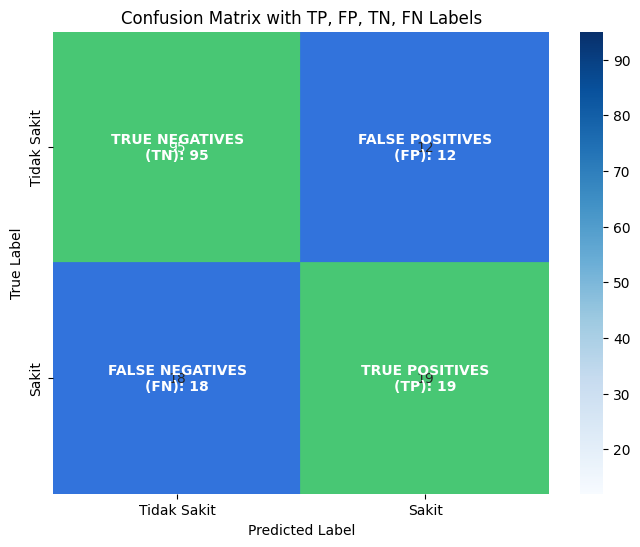

Sensitivitas (Recall untuk kelas positif): 0.51
Spesifisitas (Recall untuk kelas negatif): 0.89


In [11]:
# Classification Report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print(conf_matrix_rf)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Tidak Sakit', 'Sakit'], 
                 yticklabels=['Tidak Sakit', 'Sakit'])

# Menambahkan label TP, FP, TN, FN pada heatmap
TP = conf_matrix_rf[1, 1]  # True Positives (Data yang sebenarnya sakit dan diprediksi sakit.)
FP = conf_matrix_rf[0, 1]  # False Positives (Data yang sebenarnya tidak sakit dan diprediksi sakit.)
TN = conf_matrix_rf[0, 0]  # True Negatives (Data yang sebenarnya tidak sakit dan diprediksi tidak sakit.)
FN = conf_matrix_rf[1, 0]  # False Negatives (Data yang sebenarnya sakit dan diprediksi tidak sakit)

positions = [(0.5, 0.5), (0.5, 1.5), (1.5, 0.5), (1.5, 1.5)]  # Posisi kotak
labels = [f'TRUE NEGATIVES\n(TN): {TN}', 
          f'FALSE POSITIVES\n(FP): {FP}', 
          f'FALSE NEGATIVES\n(FN): {FN}', 
          f'TRUE POSITIVES\n(TP): {TP}']
colors = ['#48C774', '#3273DC', '#3273DC', '#48C774']  # Warna hijau/biru

for pos, label, color in zip(positions, labels, colors):
    ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1, 
                 fill=True, color=color, edgecolor='black', lw=2))
    plt.text(pos[1], pos[0], label, color='white', ha='center', va='center', 
             fontsize=10, fontweight='bold')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with TP, FP, TN, FN Labels')
plt.show()

# Menghitung sensitivitas dan spesifisitas
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"Sensitivitas (Recall untuk kelas positif): {sensitivity:.2f}")
print(f"Spesifisitas (Recall untuk kelas negatif): {specificity:.2f}")

# 6. Visualisasi Pohon Keputusan Salah Satu Pohon dari Random Forest
# plt.figure(figsize=(12, 8))
# plot_tree(clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
# plt.title("Pohon Keputusan - Decision Tree Classifier")
# plt.show()

        D.2. Menggunakan Random Forest


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       107
           1       0.55      0.59      0.57        37

    accuracy                           0.77       144
   macro avg       0.70      0.71      0.71       144
weighted avg       0.78      0.77      0.77       144

[[89 18]
 [15 22]]


C:\Users\Personal\AppData\Local\Temp\ipykernel_10892\4127829262.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1,


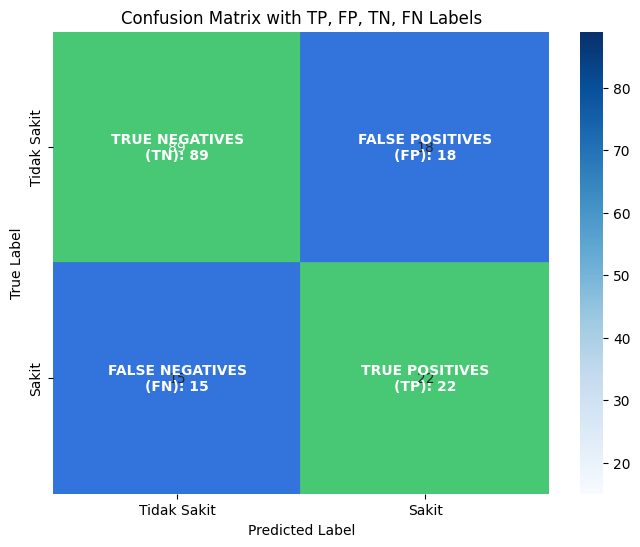

Sensitivitas (Recall untuk kelas positif): 0.59
Spesifisitas (Recall untuk kelas negatif): 0.83


In [27]:
# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Tidak Sakit', 'Sakit'], 
                 yticklabels=['Tidak Sakit', 'Sakit'])

# Menambahkan label TP, FP, TN, FN pada heatmap
TP = conf_matrix_rf[1, 1]  # True Positives (Data yang sebenarnya sakit dan diprediksi sakit.)
FP = conf_matrix_rf[0, 1]  # False Positives (Data yang sebenarnya tidak sakit dan diprediksi sakit.)
TN = conf_matrix_rf[0, 0]  # True Negatives (Data yang sebenarnya tidak sakit dan diprediksi tidak sakit.)
FN = conf_matrix_rf[1, 0]  # False Negatives (Data yang sebenarnya sakit dan diprediksi tidak sakit)

positions = [(0.5, 0.5), (0.5, 1.5), (1.5, 0.5), (1.5, 1.5)]  # Posisi kotak
labels = [f'TRUE NEGATIVES\n(TN): {TN}', 
          f'FALSE POSITIVES\n(FP): {FP}', 
          f'FALSE NEGATIVES\n(FN): {FN}', 
          f'TRUE POSITIVES\n(TP): {TP}']
colors = ['#48C774', '#3273DC', '#3273DC', '#48C774']  # Warna hijau/biru

for pos, label, color in zip(positions, labels, colors):
    ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1, 
                 fill=True, color=color, edgecolor='black', lw=2))
    plt.text(pos[1], pos[0], label, color='white', ha='center', va='center', 
             fontsize=10, fontweight='bold')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with TP, FP, TN, FN Labels')
plt.show()

# Menghitung sensitivitas dan spesifisitas
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"Sensitivitas (Recall untuk kelas positif): {sensitivity:.2f}")
print(f"Spesifisitas (Recall untuk kelas negatif): {specificity:.2f}")

# 6. Visualisasi Pohon Keputusan Salah Satu Pohon dari Random Forest
# plt.figure(figsize=(12, 8))
# plot_tree(rf_clf.estimators_[0], feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
# plt.title("Pohon Keputusan - Salah Satu Pohon dari Random Forest")
# plt.show()

        D.3. Menggunakan XGboost


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.53      0.68      0.60        37

    accuracy                           0.76       144
   macro avg       0.70      0.74      0.71       144
weighted avg       0.79      0.76      0.77       144

[[85 22]
 [12 25]]


C:\Users\Personal\AppData\Local\Temp\ipykernel_10892\2915968487.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1,


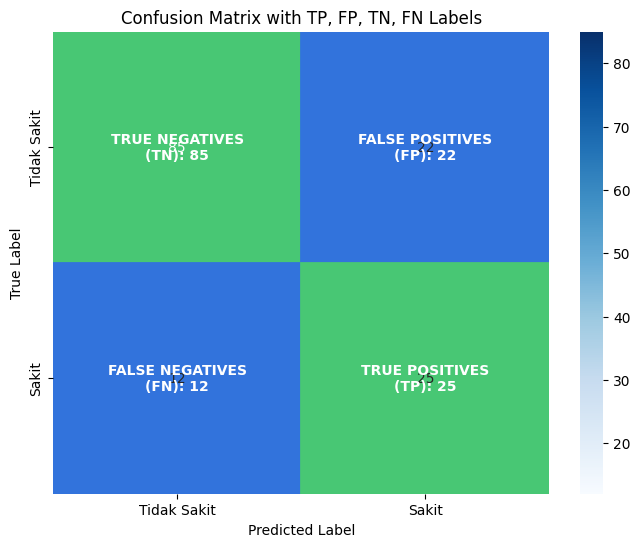

Sensitivitas (Recall untuk kelas positif): 0.68
Spesifisitas (Recall untuk kelas negatif): 0.79


In [28]:
# Classification Report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix_rf)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Tidak Sakit', 'Sakit'], 
                 yticklabels=['Tidak Sakit', 'Sakit'])

# Menambahkan label TP, FP, TN, FN pada heatmap
TP = conf_matrix_rf[1, 1]  # True Positives (Data yang sebenarnya sakit dan diprediksi sakit.)
FP = conf_matrix_rf[0, 1]  # False Positives (Data yang sebenarnya tidak sakit dan diprediksi sakit.)
TN = conf_matrix_rf[0, 0]  # True Negatives (Data yang sebenarnya tidak sakit dan diprediksi tidak sakit.)
FN = conf_matrix_rf[1, 0]  # False Negatives (Data yang sebenarnya sakit dan diprediksi tidak sakit)

positions = [(0.5, 0.5), (0.5, 1.5), (1.5, 0.5), (1.5, 1.5)]  # Posisi kotak
labels = [f'TRUE NEGATIVES\n(TN): {TN}', 
          f'FALSE POSITIVES\n(FP): {FP}', 
          f'FALSE NEGATIVES\n(FN): {FN}', 
          f'TRUE POSITIVES\n(TP): {TP}']
colors = ['#48C774', '#3273DC', '#3273DC', '#48C774']  # Warna hijau/biru

for pos, label, color in zip(positions, labels, colors):
    ax.add_patch(plt.Rectangle((pos[1] - 0.5, pos[0] - 0.5), 1, 1, 
                 fill=True, color=color, edgecolor='black', lw=2))
    plt.text(pos[1], pos[0], label, color='white', ha='center', va='center', 
             fontsize=10, fontweight='bold')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with TP, FP, TN, FN Labels')
plt.show()

# Menghitung sensitivitas dan spesifisitas
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"Sensitivitas (Recall untuk kelas positif): {sensitivity:.2f}")
print(f"Spesifisitas (Recall untuk kelas negatif): {specificity:.2f}")

# 6. Visualisasi Pohon Keputusan Salah Satu Pohon dari Random Forest
# plt.figure(figsize=(12, 8))
# plot_tree(xgb_clf, num_trees=0)  # Visualisasi pohon pertama (index 0)
# plt.title("Pohon Keputusan - Salah Satu Pohon dari XGBoost")
# plt.show()